In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
trn = pd.read_csv('train.csv')
tst = pd.read_csv('test.csv')

In [74]:
trn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
trn.shape

(891, 12)

In [49]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [75]:
trn.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

        Survived
Sex             
female  0.742038
male    0.188908


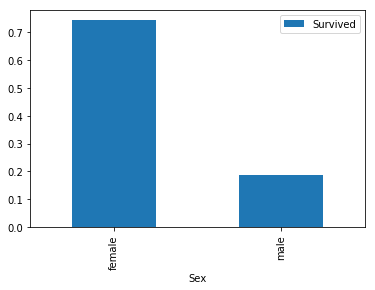

In [90]:
sex_pivot = trn.pivot_table(index="Sex",values="Survived")
print(sex_pivot)
sex_pivot.plot.bar();

In [100]:
trn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.699966,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.731181,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,-0.500000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


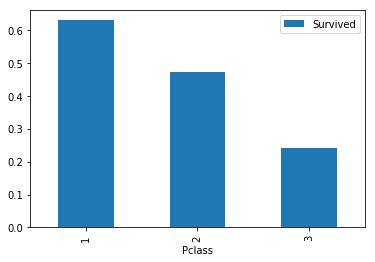

In [58]:
Class_pivot = trn.pivot_table(index="Pclass",values="Survived")
print(Class_pivot)
Class_pivot.plot.bar();

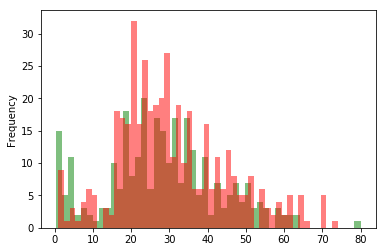

In [79]:
survived = trn[trn["Survived"] == 1]
survived["Age"].plot.hist(alpha=0.5,color='g',bins=50)
dead = trn[trn['Survived'] == 0]
dead['Age'].plot.hist(alpha=0.5,color='r',bins=50);

In [81]:
def process_age(df,cut_points,label):
    df['Age'] = df['Age'].fillna(-0.5)
    df["Age_categories"] = pd.cut(df['Age'],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 90]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

trn = process_age(trn,cut_points,label_names)
tst = process_age(tst,cut_points,label_names)

                Survived
Age_categories          
Young Adult     0.293785
Adult           0.704545
Missing         0.360000
Infant          0.428571
Teenager        0.382682
Child           0.400000
Senior          0.227273


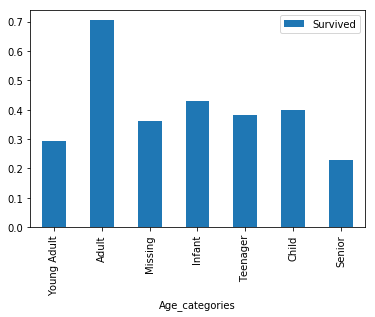

In [102]:
age_cat_pivot = trn.pivot_table(index="Age_categories",values="Survived")
print(age_cat_pivot)
age_cat_pivot.plot.bar();

In [110]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [113]:
trn = create_dummies(trn,"Pclass")
tst = create_dummies(tst,"Pclass")

trn = create_dummies(trn,"Sex")
tst = create_dummies(tst,"Sex")

trn = create_dummies(trn,"Age_categories")
tst = create_dummies(tst,"Age_categories")

In [115]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr = LogisticRegression()

In [118]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [120]:
lr.fit(trn[columns], trn['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
predictions = lr.predict(trn[columns])

In [128]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(trn['Survived'], predictions)
accuracy

0.8080808080808081